# |---------A comprehensive guide to EDA-----------|
---
## Author: Rana Umar
## Dataset: Google Play Store
## Action: Exploratory Data Analysis

## Dataset Link: https://www.kaggle.com/datasets/lava18/google-play-store-apps
---
`Most of the peoples are confused with data wrangling and EDA. Both are the steps we have to done before models traing.`

`Data Wrangling include the steps to prepare data for finding out patterns, understanding data and building models. The steps include in Data wranglings are:`

- Handling missing values
- Detecting and removing outliers
- Normalizing and scaling data
- Handling duplicates
- Correcting the datatypes
- Encoding Categories

`let's start our journey! Take Rating as our Target Variable and prepare data for regression model.`

### import libraries and load dataset

In [246]:
# import libraries
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [247]:
# load dataset
df=pd.read_csv("./Datasets/googleplaystore.csv")
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


### Basic Data Info

In [248]:
# info of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [249]:
df.shape

(10841, 13)

In [250]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


### Handling Dublicates

In [251]:
df.duplicated().sum()

483

In [252]:
df=df.drop_duplicates()

In [253]:
df.duplicated().sum()

0

### Dealing with type correction

---
`we need type correction here such as Reviews show object while it should be int, price show object while it should be int or fleat etc.`

Why tyep correction is necessary? The ans of this question to make the efficient use of memory! Data is memroy consuming the types of data decide how much memory the data take. The rihgt datatype of the col help to use memroy efficiently.

In [254]:
# 0. App
df['App']=df['App'].astype('string')

In [255]:
# 1. Category
# when there are some strings that are repeating (e.g. Male, Femal, Others etc.) then the type of the col should be category.
print(f"Unique values in Category columns: {df.Category.nunique()}/{df.Category.value_counts().sum()}")
df["Category"]=df["Category"].astype("category")


Unique values in Category columns: 34/10358


In [256]:
# 2. Rating
df["Rating"]=df["Rating"].astype("float")

In [257]:
df['Reviews']=df['Reviews'].str.replace('M','')
df['Reviews']=df['Reviews'].astype('float')
df.rename(columns={'Reviews':'Reviews(M)'}, inplace=True)

``In Size col datatype is object. while it should be int. But problem is that ther is M with the number makeing it string or object.
what we do is change the col name Size to Size(MB) and make col int.``

In [258]:
# 3. Size
# changing col name size -> size(Mb)
df.rename(columns={"Size":"Size(MB)"}, inplace=True)

def convert_size(size):
    if size == "Varies with device":
        return np.nan
    elif 'M' in size:
        return float(size.replace('M',''))
    elif 'K' in size or 'k' in size:
        return float(size.replace('K','').replace('k',''))/1024
    
df["Size(MB)"]=df["Size(MB)"].apply(convert_size)

In [259]:
# 4. Installs
def convert_to_K(value):
    if '+' in value:
        return value.replace('+','').replace(',','')
df['Installs']=df['Installs'].apply(convert_to_K)

df['Installs']=pd.to_numeric(df['Installs'])

In [260]:
# 5. Type
print(df['Type'].unique())
df['Type']=df['Type'].replace('0',np.nan)
df['Type']=df['Type'].astype('category')

['Free' 'Paid' nan '0']


In [261]:
# 6. Price
print(df['Price'].unique())
df.rename(columns={'Price':'Price($)'}, inplace=True)
df['Price($)']=df['Price($)'].replace('Everyone',np.nan).str.replace('$','')
df['Price($)']=df['Price($)'].astype('float')

['0' '$4.99' '$3.99' '$6.99' '$1.49' '$2.99' '$7.99' '$5.99' '$3.49'
 '$1.99' '$9.99' '$7.49' '$0.99' '$9.00' '$5.49' '$10.00' '$24.99'
 '$11.99' '$79.99' '$16.99' '$14.99' '$1.00' '$29.99' '$12.99' '$2.49'
 '$10.99' '$1.50' '$19.99' '$15.99' '$33.99' '$74.99' '$39.99' '$3.95'
 '$4.49' '$1.70' '$8.99' '$2.00' '$3.88' '$25.99' '$399.99' '$17.99'
 '$400.00' '$3.02' '$1.76' '$4.84' '$4.77' '$1.61' '$2.50' '$1.59' '$6.49'
 '$1.29' '$5.00' '$13.99' '$299.99' '$379.99' '$37.99' '$18.99' '$389.99'
 '$19.90' '$8.49' '$1.75' '$14.00' '$4.85' '$46.99' '$109.99' '$154.99'
 '$3.08' '$2.59' '$4.80' '$1.96' '$19.40' '$3.90' '$4.59' '$15.46' '$3.04'
 '$4.29' '$2.60' '$3.28' '$4.60' '$28.99' '$2.95' '$2.90' '$1.97'
 '$200.00' '$89.99' '$2.56' '$30.99' '$3.61' '$394.99' '$1.26' 'Everyone'
 '$1.20' '$1.04']


In [262]:
# 7. Content Rating
df['Content Rating'].unique()
df['Content Rating']=df['Content Rating'].astype('category')

In [263]:
# 8. Genres
df['Genres']=df['Genres'].astype('string')


In [264]:
# 9. Last Updates
df['Last Updated']=pd.to_datetime(df['Last Updated'], format='mixed', errors='coerce')

In [265]:
# 10. Current version
df['Current Ver']=df['Current Ver'].replace('Varies with device',np.nan)
df['Current Ver']=df['Current Ver'].astype('string')

In [266]:
# 11. Android version
df['Android Ver']=df['Android Ver'].replace('Varies with device', np.nan)
df['Android Ver']=df['Android Ver'].astype('string')

In [267]:
df.dtypes

App               string[python]
Category                category
Rating                   float64
Reviews(M)               float64
Size(MB)                 float64
Installs                 float64
Type                    category
Price($)                 float64
Content Rating          category
Genres            string[python]
Last Updated      datetime64[ns]
Current Ver       string[python]
Android Ver       string[python]
dtype: object

### Dealing with missing values and data anamoles

---
`There is a common approach that if the missingness is greater than 75% then we will simply remove that col otherwise we will proceed to impute the values`

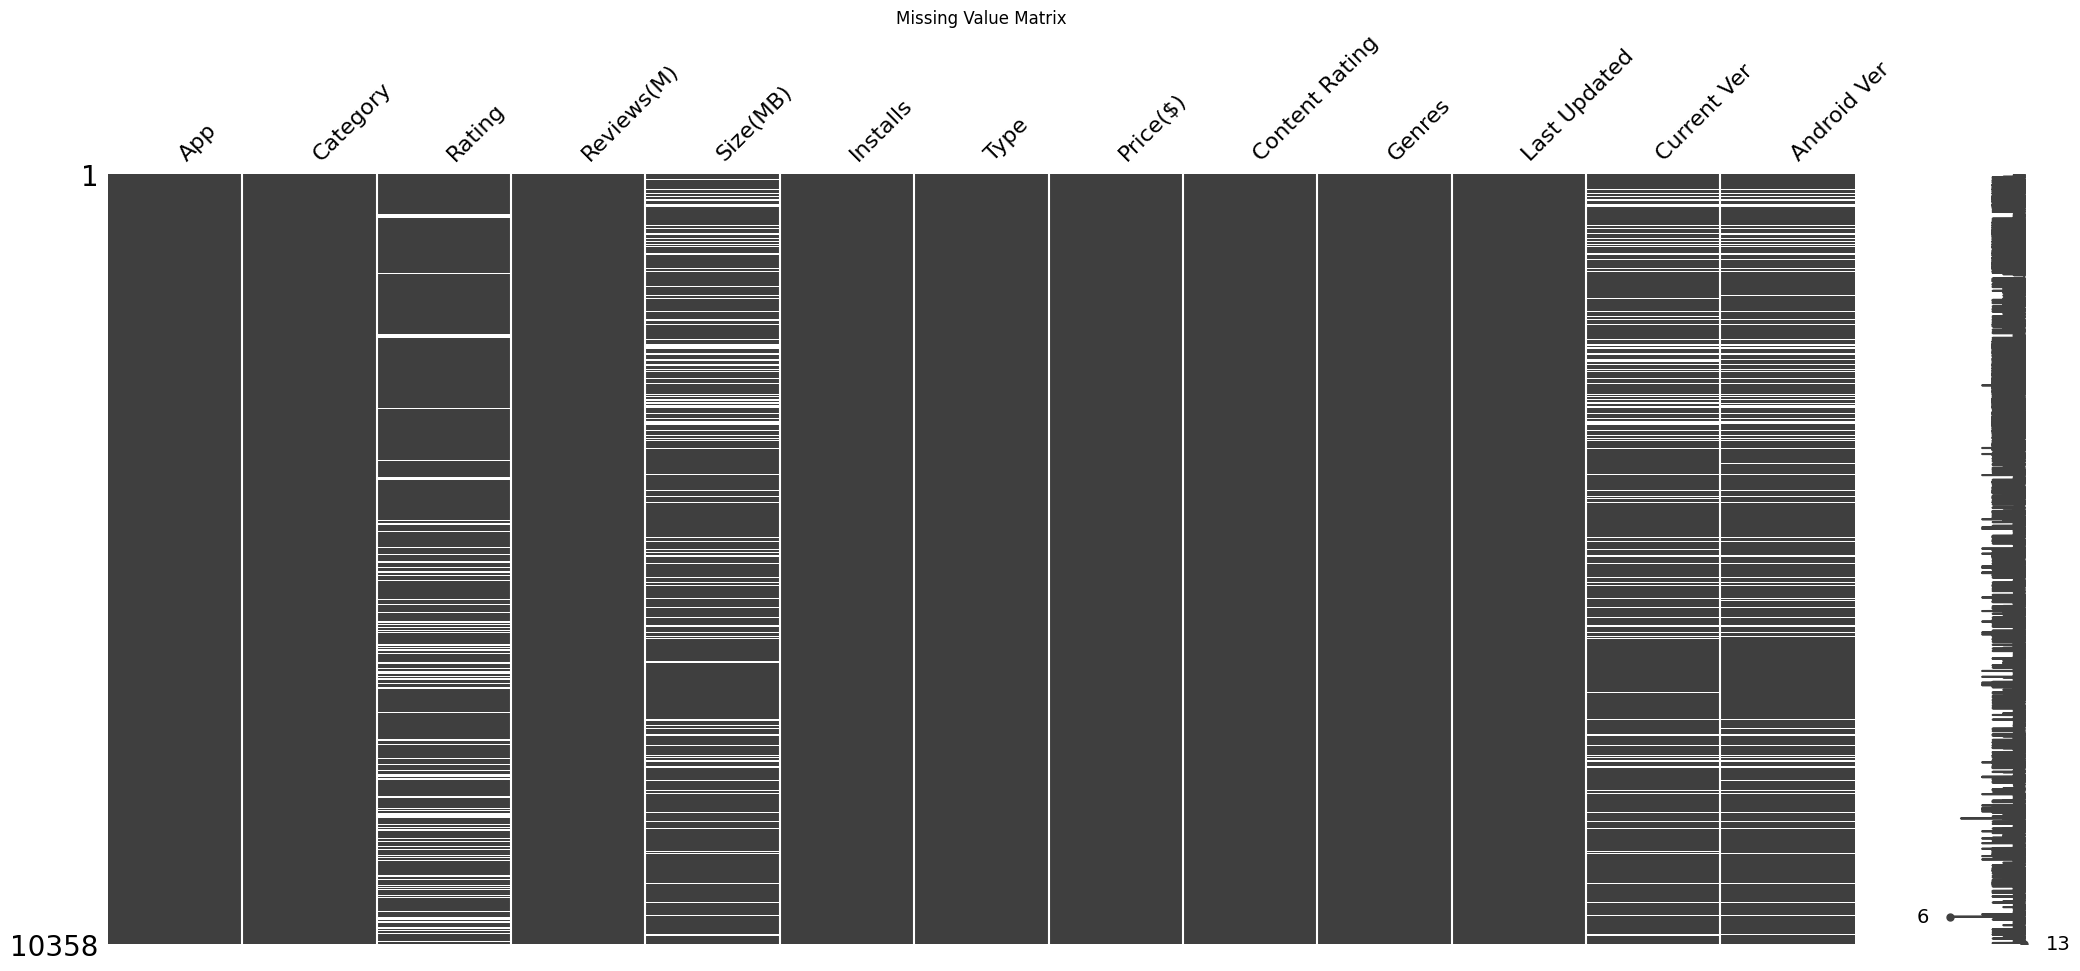

In [268]:
import missingno as msno
import matplotlib.pyplot as plt

msno.matrix(df)
plt.title("Missing Value Matrix")
plt.show()

In [269]:
list=[(df[col].isnull().sum()/df[col].value_counts().sum())*100 for col in df.columns]
null_values=df.isnull().sum()
summary=pd.DataFrame({"null_values":null_values, "percentage":list})
summary

,null_values,percentage
App,0,0.000000
Category,0,0.000000
Rating,1465,16.473631
Reviews(M),0,0.000000
Size(MB),1527,17.291360
Installs,2,0.019312
Type,2,0.019312
Price($),1,0.009655
Content Rating,1,0.009655
Genres,0,0.000000


`The graph show that the missingness is of Missing Completely At Random (MCAR). So we use simple imputation method.`
- mean
- median
- mode

`so we will use median becuase it is effective to outliers`

In [270]:
def fillna(col):
    if df[col].isnull().sum()>0:
        if df[col].dtypes=="float" or df[col].dtypes=="int":
            df[col].fillna(df[col].median(), inplace=True)
        elif df[col].dtypes=="category" or df[col].dtypes=="string[python]":
            df[col].fillna(df[col].mode()[0], inplace=True)
        elif df[col].dtypes=="datetime64[ns]":
            df[col].fillna(df[col].ffill(), inplace=True)

for col in df.columns:
    fillna(col)

In [271]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews(M)        0
Size(MB)          0
Installs          0
Type              0
Price($)          0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

### Outlier detection + Feature Engineering

---
`This part include making new cols(features) form existing that help to predict rating and normalizing the col`

#### Univariate analysis to check outlier and data deistribuiton

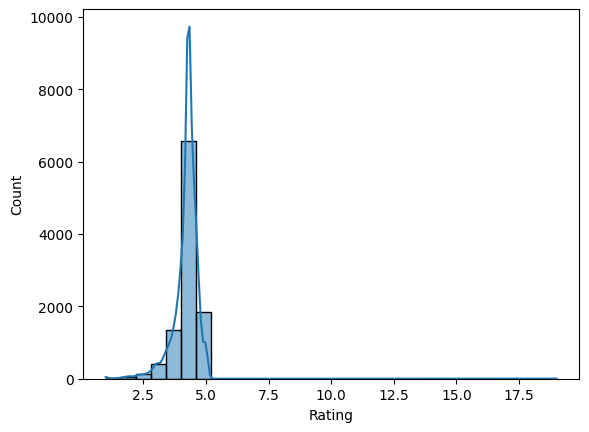

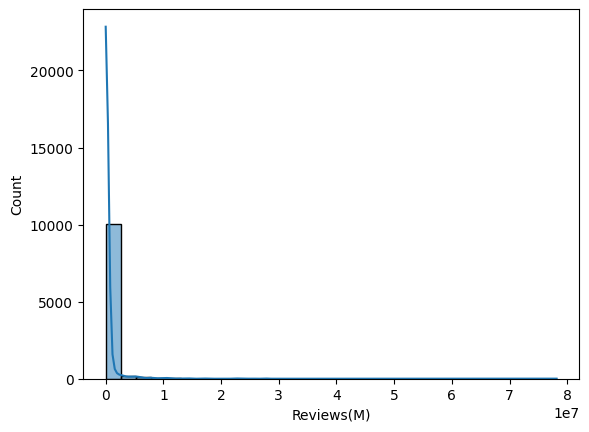

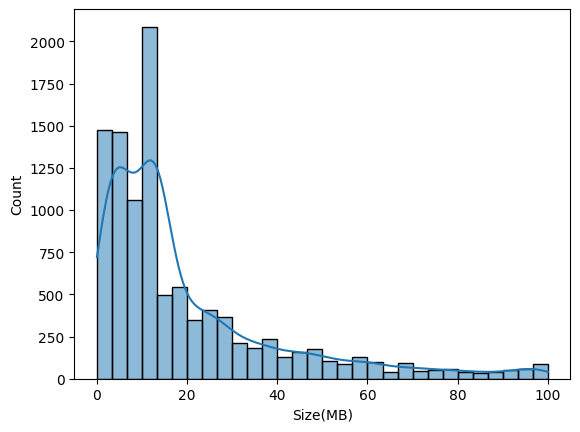

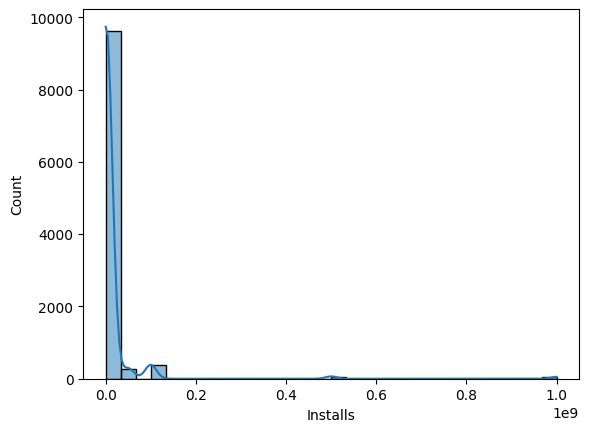

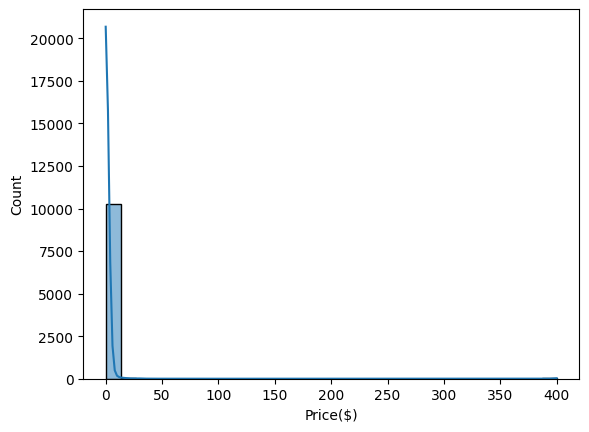

In [272]:
# check the distribution of numeric columns
for col in df.select_dtypes(include='number'):
    sns.histplot(data=df[col], kde=True, bins=30)
    plt.show()

`As we seen in our rating col the ratnig value goes more than 17.5 which mean there is data error. let check and remove these apps.`

In [273]:
df[df['Rating']>5]

,App,Category,Rating,Reviews(M),Size(MB),Installs,Type,Price($),Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0,13.0,100000.0,Free,0.0,Everyone,"February 11, 2018",2014-08-05,4.0 and up,4.1 and up


`There is one app that show rating 19.0 so it is data collection error and we will simply reomve that app.`

In [274]:
df=df[df['Rating']<=5]

In [275]:
# Fucntion to detect outliers
def find_outliers(col):
    Q1=col.quantile(0.25)
    Q3=col.quantile(0.75)
    IQR=Q3-Q1

    lower_fance=Q1-1.5*IQR
    upper_fance=Q3+1.5*IQR

    outlier = df[(df['Size(MB)'] < lower_fance) | (df['Size(MB)'] > upper_fance)]
    return lower_fance, upper_fance, outlier

lower_fance, upper_fance, outlier = find_outliers(df['Size(MB)'])

print(f"Lower fance is {lower_fance}")
print(f"Upper fance is: {upper_fance}")
print("--------------------------------------------------------------")
print(f"total rows of column: {df['Size(MB)'].value_counts().sum()}")
print(f"Outlier detected: {outlier.value_counts().sum()}")

Lower fance is -24.750000000000004
Upper fance is: 56.45
--------------------------------------------------------------
total rows of column: 10357
Outlier detected: 831


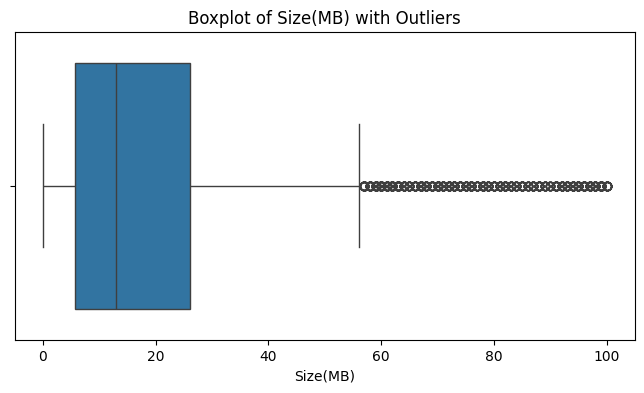

In [276]:
plt.figure(figsize=(8,4))
sns.boxplot(x=df['Size(MB)'])
plt.title('Boxplot of Size(MB) with Outliers')
plt.show()

In [277]:
# check which category is more as outlier
outlier['Category'].value_counts()

Category
GAME                   315
FAMILY                 286
SPORTS                  30
HEALTH_AND_FITNESS      24
MEDICAL                 23
SOCIAL                  19
TRAVEL_AND_LOCAL        15
FINANCE                 15
LIFESTYLE                8
PERSONALIZATION          8
EDUCATION                7
PRODUCTIVITY             7
PARENTING                7
TOOLS                    7
VIDEO_PLAYERS            7
BUSINESS                 7
PHOTOGRAPHY              6
ENTERTAINMENT            5
AUTO_AND_VEHICLES        5
BOOKS_AND_REFERENCE      5
COMMUNICATION            4
FOOD_AND_DRINK           4
MAPS_AND_NAVIGATION      4
HOUSE_AND_HOME           3
DATING                   3
LIBRARIES_AND_DEMO       2
SHOPPING                 2
NEWS_AND_MAGAZINES       1
EVENTS                   1
BEAUTY                   1
1.9                      0
ART_AND_DESIGN           0
COMICS                   0
WEATHER                  0
Name: count, dtype: int64

In [278]:
# which genres has more outliers?
outlier.Genres.value_counts()

Genres
Action                          126
Simulation                       56
Arcade                           54
Strategy                         42
Role Playing                     38
                               ... 
News & Magazines                  1
Racing;Pretend Play               1
Books & Reference;Creativity      1
Role Playing;Education            1
Strategy;Creativity               1
Name: count, Length: 79, dtype: Int64

In [279]:
# what is the size of outliers
outlier['Size(MB)'].unique()

array([ 57.,  73.,  61.,  66.,  63.,  77.,  70.,  84.,  97.,  76.,  59.,
        78.,  72.,  93.,  65.,  79., 100.,  58.,  68.,  64.,  67.,  60.,
        94.,  99.,  95.,  80.,  74.,  62.,  69.,  75.,  98.,  85.,  82.,
        96.,  87.,  71.,  86.,  91.,  81.,  92.,  83.,  88.,  89.,  90.])

`These apps have reasonable Size(MB), most of our apps have Size in KB due to which these apps(have size in Mbs) detecting as outlier. If we are removing these apps then it cause`
- loss of information
- Model will not perform well for apps that have size in mbs

`so we will transoform our Size(Mb) columns to keep these outliers`

In [280]:
#log transformation
df['Size(log)']=np.log(df['Size(MB)'])

<Axes: xlabel='Size(log)', ylabel='Count'>

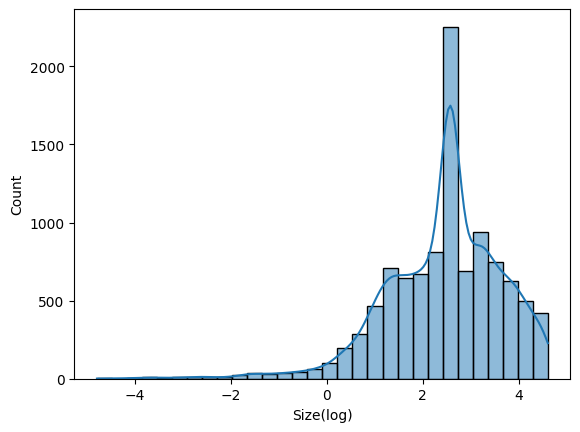

In [281]:
sns.histplot(data=df['Size(log)'], kde=True, bins=30)

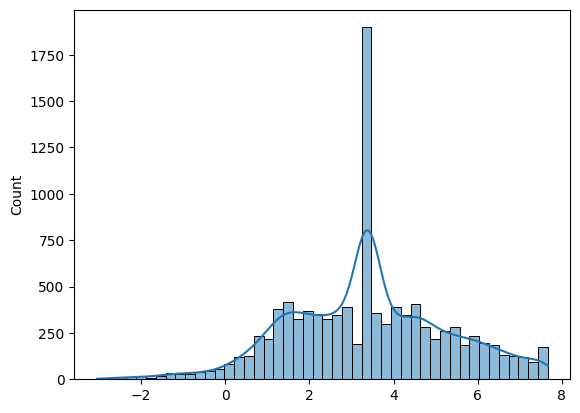

In [282]:
# boxcox
from scipy.stats import boxcox

size=df['Size(MB)']
boxcox_transformation, fitted_lambda = boxcox(size)

sns.histplot(data=boxcox_transformation, kde=True)

df['Size(boxcox)']=boxcox_transformation

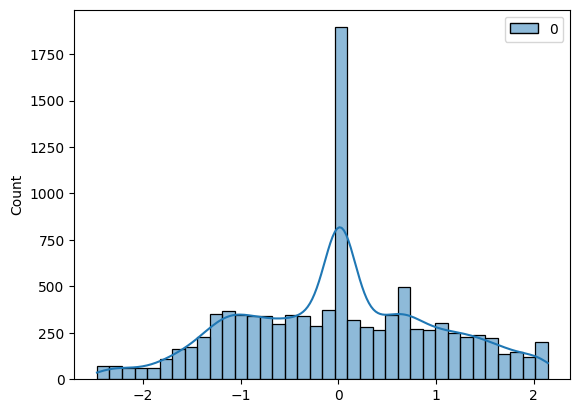

In [283]:
# yeo-johnson
from sklearn.preprocessing import PowerTransformer 

pt=PowerTransformer(method='yeo-johnson')
data=df[['Size(MB)']]
pt_transformation = pt.fit_transform(data)

sns.histplot(data=pt_transformation, kde=True)

df['Size(pt)']=pt_transformation

In [284]:
# detecting outliers for log
from scipy.stats import zscore

zscore=zscore(df['Size(log)'])

outliers=np.abs(zscore) > 3

outliers.value_counts()

Size(log)
False    10228
True       129
Name: count, dtype: int64

In [285]:
# detecting outliers for boxcox
from scipy.stats import zscore

zscore_boxcox=zscore(df['Size(boxcox)'])

outliers=np.abs(zscore_boxcox) > 3

outliers.value_counts()

Size(boxcox)
False    10332
True        25
Name: count, dtype: int64

In [286]:
# detecting outliers for yeo-johnson
from scipy.stats import zscore

zscore=zscore(df['Size(pt)'])

outliers = np.abs(zscore) > 3

outliers.value_counts()

Size(pt)
False    10357
Name: count, dtype: int64

`yeo-johnson perfrom well and have tranform all the outliers into datapoints.`

In [287]:
# detecting outliers for Reviews column
lower_fance, upper_fance, outlier= find_outliers(df['Reviews(M)'])

print("outlier detection for Reviews")
print(f"Lower fance is {lower_fance}")
print(f"Upper fance is: {upper_fance}")
print("--------------------------------------------------------------")
print(f"total rows of column: {df['Reviews(M)'].value_counts().sum()}")
print(f"Outlier detected: {outlier.value_counts().sum()}")

outlier detection for Reviews
Lower fance is -69544.0
Upper fance is: 115992.0
--------------------------------------------------------------
total rows of column: 10357
Outlier detected: 0


In [288]:
# detecting outliers for Installs column
lower_fance, upper_fance, outlier= find_outliers(df['Installs'])

print("outlier detection for Installs")
print(f"Lower fance is {lower_fance}")
print(f"Upper fance is: {upper_fance}")
print("--------------------------------------------------------------")
print(f"total rows of column: {df['Installs'].value_counts().sum()}")
print(f"Outlier detected: {outlier.value_counts().sum()}")

outlier detection for Installs
Lower fance is -1497500.0
Upper fance is: 2498500.0
--------------------------------------------------------------
total rows of column: 10357
Outlier detected: 0


In [289]:
# detecting outlier for Price column
lower_fance, upper_fance, outlier_values= find_outliers(df['Price($)'])

print("outlier detection for Price($)")
print(f"Lower fance is {lower_fance}")
print(f"Upper fance is: {upper_fance}")
print("--------------------------------------------------------------")
print(f"total rows of column: {df['Price($)'].value_counts().sum()}")
print(f"Outlier detected: {outlier_values.value_counts().sum()}")

outlier detection for Price($)
Lower fance is 0.0
Upper fance is: 0.0
--------------------------------------------------------------
total rows of column: 10357
Outlier detected: 10357


`sinse all the values are detecting as outlier and this is becuase our lower and upper fence are 0 which means most of the our apps have 0 price. if we remove this col then we will lose information. To keep the intent of price col what we will do is we make another column with is_paid and is_expensive.`

**Note:** *We have not to use IQR, zscore when data distribution has a long spike at 0 or more values are 0, because IQR and zsocre use standar deivation and mean to find outlier and in this case the mean will be near to 0 and cause problem. Instead we have to check the outlier using other method such as Modified zscore or percentile method.*

`In our case we know the domain knowledge that these values in price col are not outlier but still has large gap $0-$400, so we simply normalize or sacle them using some transformation techniques.`

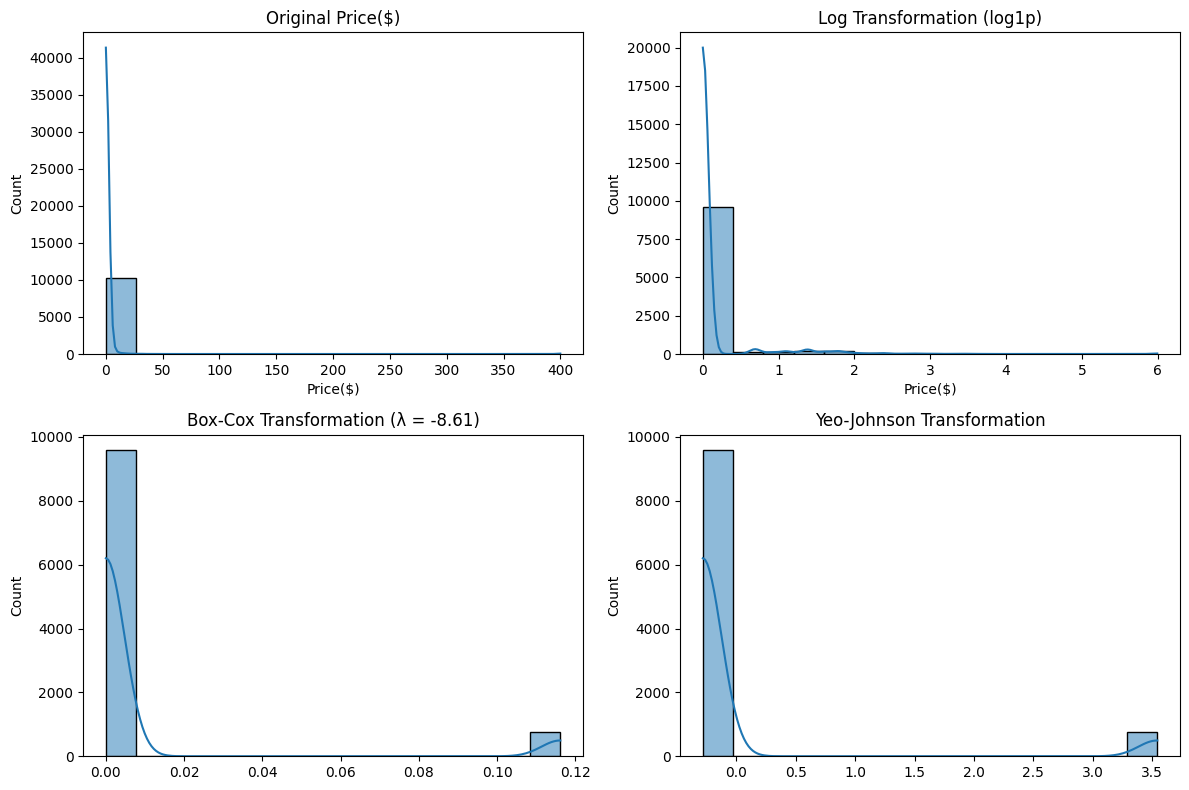

In [290]:
from scipy.stats import boxcox
from sklearn.preprocessing import PowerTransformer


# Transformations
log_transformation = np.log1p(df['Price($)'])

data = df['Price($)'] + 1  # Box-Cox requires strictly positive
boxcox_transformation, lambda_value = boxcox(data)

pt = PowerTransformer(method='yeo-johnson')
pt_transformation = pt.fit_transform(df[['Price($)']])  # Returns 2D array

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Plot 1: Original
sns.histplot(df['Price($)'], kde=True, ax=axes[0][0])
axes[0][0].set_title("Original Price($)")

# Plot 2: Log Transformation
sns.histplot(log_transformation, kde=True, ax=axes[0][1])
axes[0][1].set_title("Log Transformation (log1p)")

# Plot 3: Box-Cox
sns.histplot(boxcox_transformation, kde=True, ax=axes[1][0])
axes[1][0].set_title(f"Box-Cox Transformation (λ = {lambda_value:.2f})")

# Plot 4: Yeo-Johnson
sns.histplot(pt_transformation.flatten(), kde=True, ax=axes[1][1])
axes[1][1].set_title("Yeo-Johnson Transformation")

plt.tight_layout()
plt.show()

`we will use log transformation because it cpmpressed the data and integrate the large app with main spike while the boxcox and yeo-johnson make a large spike of 0 at right and small spike of large apps at left end (not compressed or integrate the data with the main cluster or main spike.)`

In [291]:
df['Price_log']=log_transformation

In [292]:
df["Price_log"].unique()

array([0.        , 1.79009141, 1.60743591, 2.07819076, 0.91228271,
       1.38379123, 2.19611285, 1.94448056, 1.5018527 , 1.09527339,
       2.39698577, 2.138889  , 0.68813464, 2.30258509, 1.87026253,
       2.39789527, 3.25771185, 2.56417983, 4.39432569, 2.88981605,
       2.77196353, 0.69314718, 3.43366457, 2.63834279, 1.24990174,
       2.48407297, 0.91629073, 3.04404613, 2.83262494, 3.55506231,
       4.33060175, 3.71332813, 1.59938758, 1.70292826, 0.99325177,
       2.30158459, 1.09861229, 1.58514522, 3.29546643, 5.99393649,
       2.94391252, 5.99396143, 1.3912819 , 1.01523068, 1.7647308 ,
       1.75267208, 0.95935022, 1.25276297, 0.95165788, 2.0135688 ,
       0.82855182, 1.79175947, 2.70738331, 5.70707704, 5.94277313,
       3.6633052 , 2.99523215, 5.96868198, 3.03974916, 2.25023861,
       1.01160091, 2.7080502 , 1.76644166, 3.87099266, 4.70944011,
       5.0497919 , 1.40609699, 1.2781522 , 1.75785792, 1.08518927,
       3.0155349 , 1.58923521, 1.72097929, 2.8009332 , 1.39624

`Making another column from price will help the model to indentify that which app is paid and which is free more easily`

In [293]:
df["is_paid"]=df['Price($)'].apply(lambda x: 0 if x==0 else 1).astype("int")

 `we have done univariate analysis on numeric features now let take a look on categorical features`

In [241]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews(M)', 'Size(MB)', 'Installs',
       'Type', 'Price($)', 'Content Rating', 'Genres', 'Last Updated',
       'Current Ver', 'Android Ver', 'Size(log)', 'Size(boxcox)', 'Size(pt)',
       'Price_log', 'is_paid'],
      dtype='object')

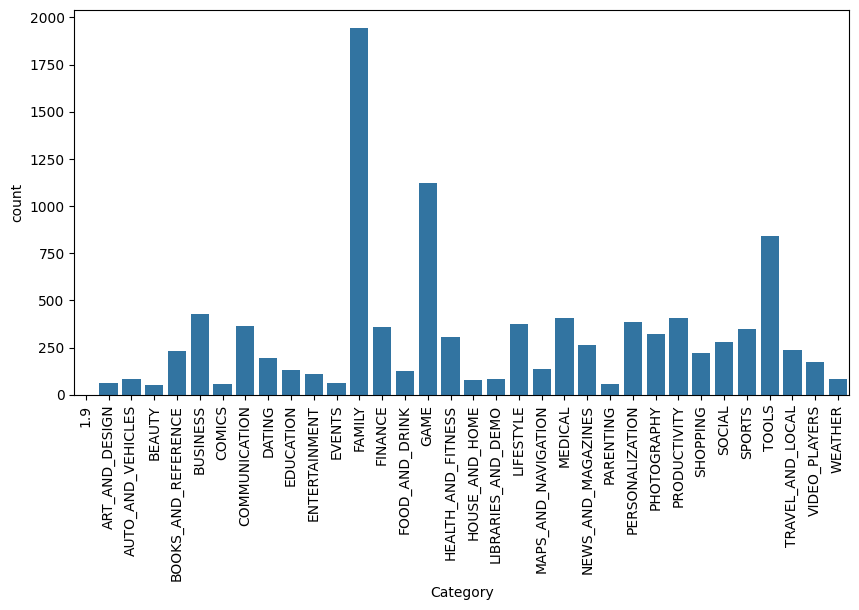

In [294]:
# which category mostly occurs?
plt.figure(figsize=(10,5))
sns.countplot(x=df['Category'], data=df)
plt.xticks(rotation='vertical')
plt.show()

`As we see there is a category named as 1.9, this seem to be data collecton error. lets check and delete it`

In [296]:
df=df[df['Category']!='1.9']
df['Category'] = df['Category'].cat.remove_unused_categories()

In [297]:
df['Genres'].unique()

<StringArray>
[                   'Art & Design',       'Art & Design;Pretend Play',
         'Art & Design;Creativity', 'Art & Design;Action & Adventure',
                 'Auto & Vehicles',                          'Beauty',
               'Books & Reference',                        'Business',
                          'Comics',               'Comics;Creativity',
 ...
             'Lifestyle;Education',    'Books & Reference;Creativity',
     'Books & Reference;Education',                'Puzzle;Education',
          'Role Playing;Education',        'Role Playing;Brain Games',
              'Strategy;Education',             'Racing;Pretend Play',
        'Communication;Creativity',             'Strategy;Creativity']
Length: 119, dtype: string

`As we seen catgory and Genres have identical values so we will keep one and drop other!`

In [298]:
df.drop(columns={'Genres'}, inplace=True)

In [299]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews(M)', 'Size(MB)', 'Installs',
       'Type', 'Price($)', 'Content Rating', 'Last Updated', 'Current Ver',
       'Android Ver', 'Size(log)', 'Size(boxcox)', 'Size(pt)', 'Price_log',
       'is_paid'],
      dtype='object')

In [300]:
df['is_paid'].value_counts()

is_paid
0    9592
1     765
Name: count, dtype: int64

#### Bivariate Analysis to check relationship b/w features

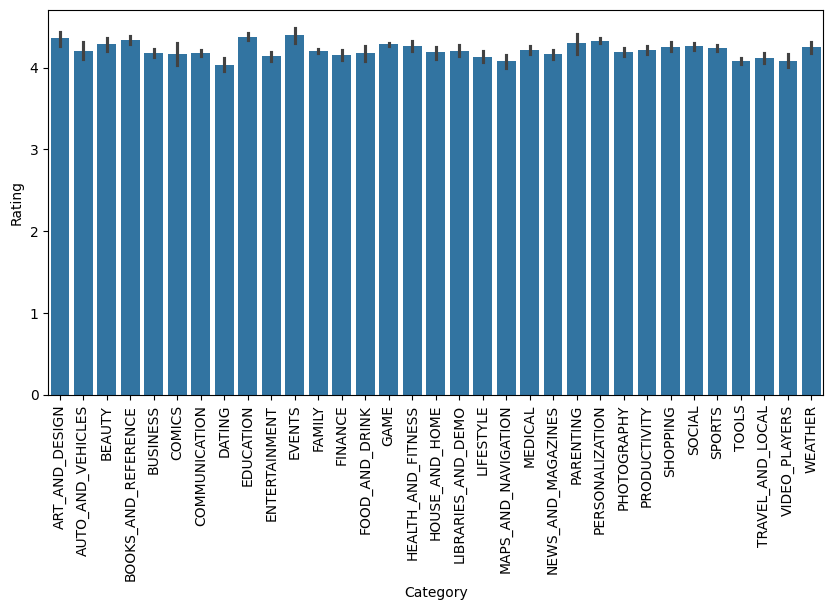

In [301]:
# which category has more Rating?
plt.figure(figsize=(10,5))
sns.barplot(x=df['Category'], y=df['Rating'], data=df)
plt.xticks(rotation='vertical')
plt.show()

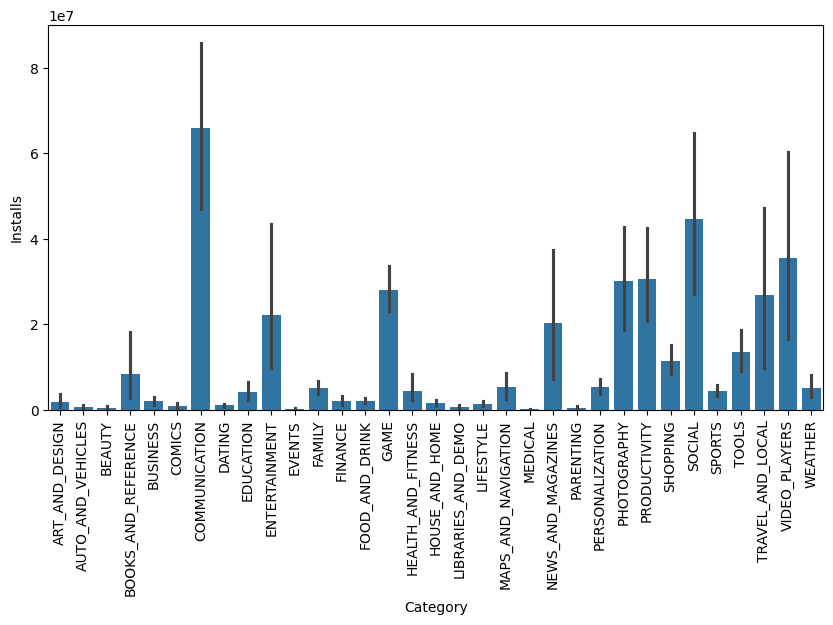

In [302]:
# which category has more installs?
plt.figure(figsize=(10,5))
sns.barplot(x=df['Category'], y=df['Installs'], data=df)
plt.xticks(rotation='vertical')
plt.show()

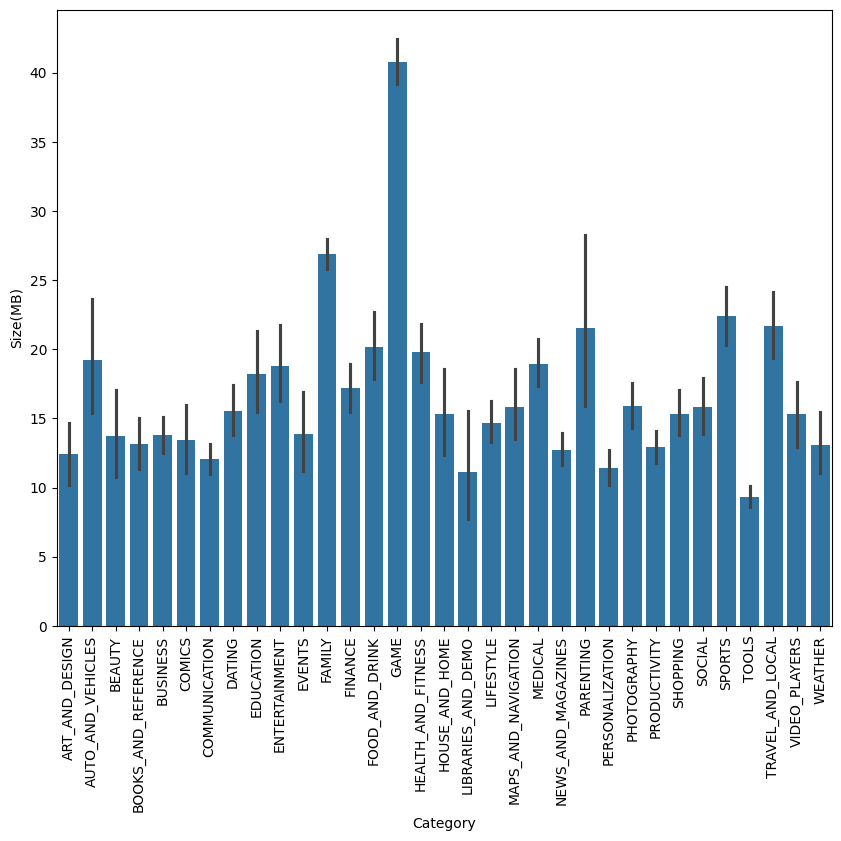

In [303]:
# which category has more size
plt.figure(figsize=(10,8))
sns.barplot(x='Category', y='Size(MB)', data=df)
plt.xticks(rotation='vertical')
plt.show()

In [122]:
df.groupby('Reviews(M)')['Rating'].size()

Reviews(M)
0.0           579
1.0           272
2.0           213
3.0           170
4.0           137
             ... 
66577446.0      1
69109672.0      1
69119316.0      1
78128208.0      1
78158306.0      1
Name: Rating, Length: 6001, dtype: int64

Text(0.5, 1.0, 'Rating vs Reviews')

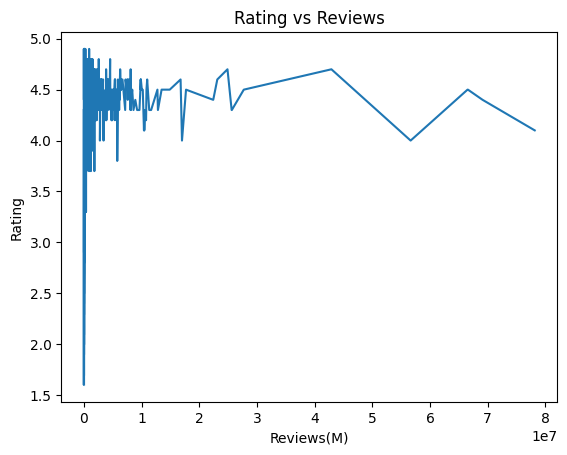

In [305]:
# Does more review has more rating?
sns.lineplot(x='Reviews(M)', y='Rating', data=df)
plt.title('Rating vs Reviews')

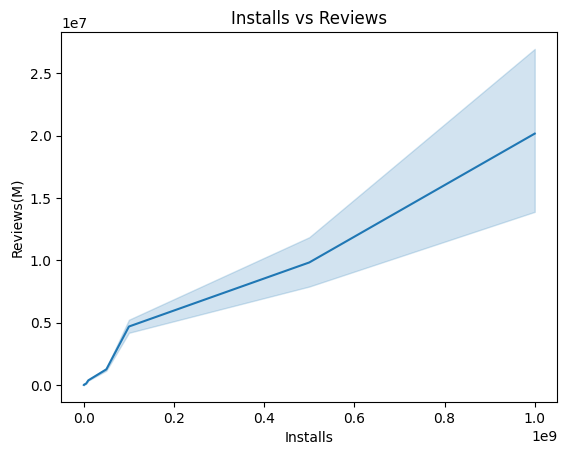

In [131]:
# Does more installs has more reviews?
sns.lineplot(x='Installs', y='Reviews(M)', data=df)
plt.title("Installs vs Reviews")
plt.show()

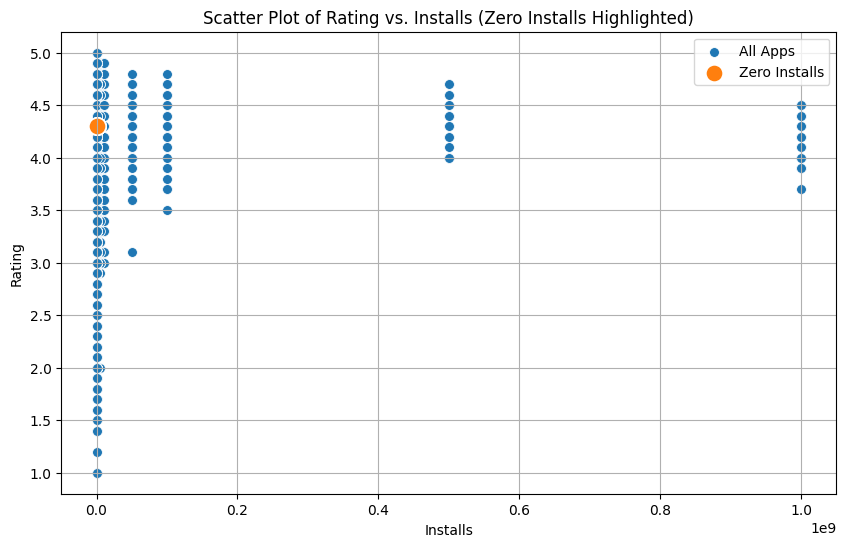

In [306]:
# Does more install has more rating?
df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

# Identify rows where 'Installs' is close to zero
zero_installs = df[df['Installs'].abs() < 1e-6]

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Installs', y='Rating', data=df, label='All Apps', s=50)  # Adjust size of all points

# Overlay the zero install apps with a different color and size
sns.scatterplot(x='Installs', y='Rating', data=zero_installs, s=150, label='Zero Installs')  # Increase size

# Add labels and title
plt.xlabel('Installs')
plt.ylabel('Rating')
plt.title('Scatter Plot of Rating vs. Installs (Zero Installs Highlighted)')
plt.legend()
plt.grid(True)
plt.show()


`There are some apps that show 0 installs but still show rating. This is because when we impute null values in our rating col using mean, it also impute there where Installs was 0. As install was 0 so rating show there NaN but when we impute rating it show some rating for 0 installs apps. So we simply remove these apps.`

In [307]:
df=df[df['Installs']!=0]

In [308]:
df[df['Installs']==0].value_counts().sum()

0

#### Multivariate analysis to check correlation b/w features

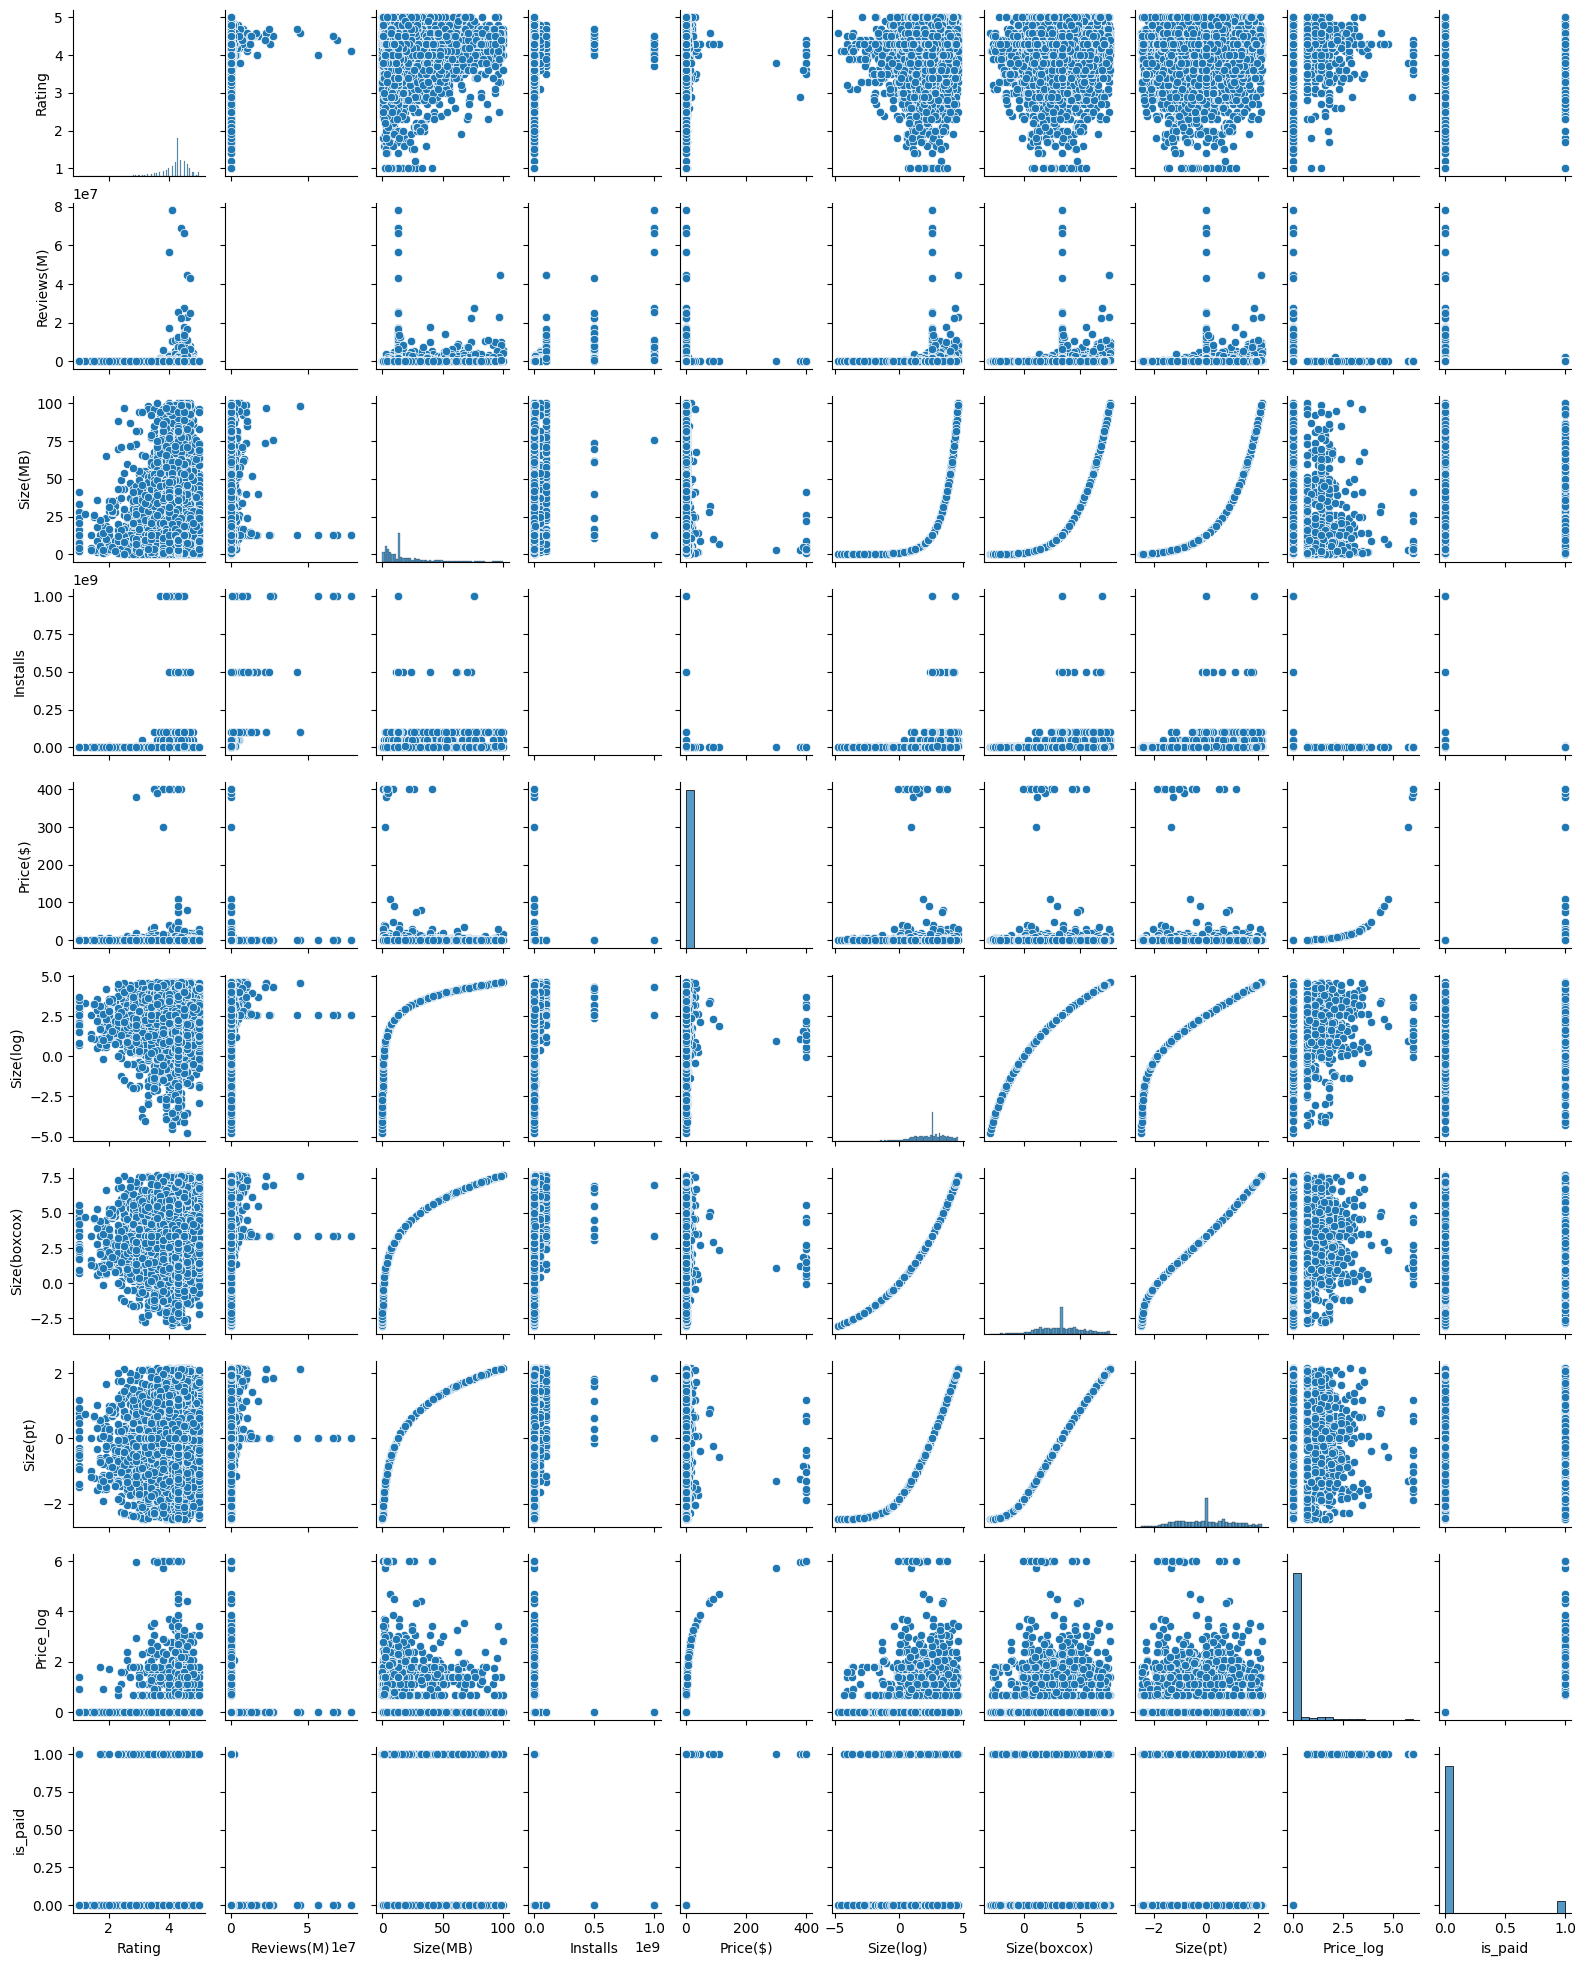

In [144]:
sns.pairplot(data=df, height=2, aspect=0.8)

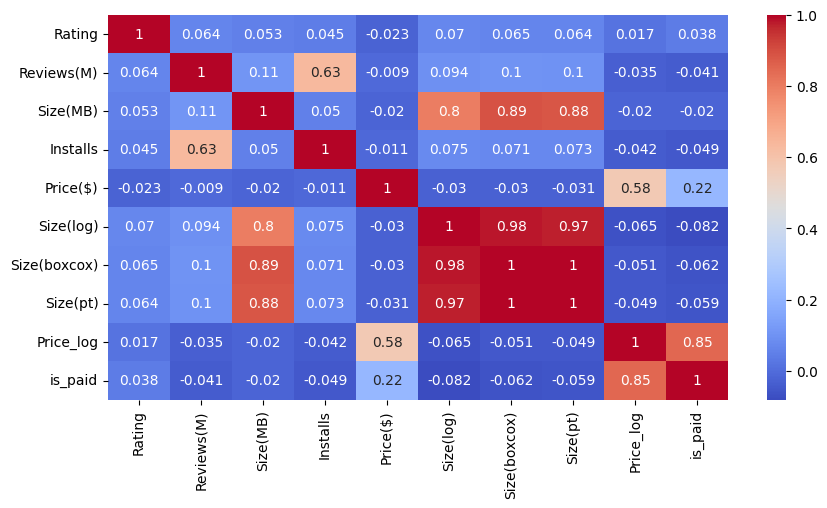

In [315]:
corr=df.select_dtypes(include='number').corr()

plt.figure(figsize=(10,5))
sns.heatmap(data=corr, cmap='coolwarm', annot=True)
plt.show()

`heatmap for col that i am going to use to predict rating`

<Axes: >

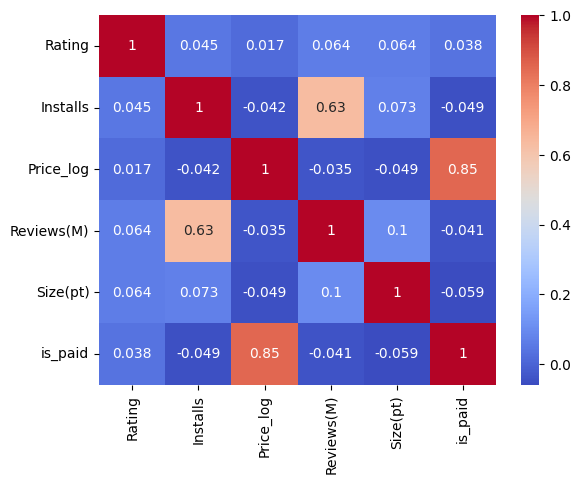

In [316]:
corr=df[['Rating', 'Installs', 'Price_log', 'Reviews(M)', 'Size(pt)', 'is_paid']].corr()
sns.heatmap(data=corr, annot=True, cmap='coolwarm')

`Select what columns we have to keep and what have to drop`

In [327]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews(M)', 'Size(MB)', 'Installs',
       'Type', 'Price($)', 'Content Rating', 'Last Updated', 'Current Ver',
       'Android Ver', 'Size(log)', 'Size(boxcox)', 'Size(pt)', 'Price_log',
       'is_paid'],
      dtype='object')

In [328]:
df.drop(columns={'App','Size(boxcox)', 'Size(log)', 'Last Updated', 'Current Ver', 'Android Ver', }, inplace=True)

In [329]:
df.columns

Index(['Category', 'Rating', 'Reviews(M)', 'Size(MB)', 'Installs', 'Type',
       'Price($)', 'Content Rating', 'Size(pt)', 'Price_log', 'is_paid'],
      dtype='object')

### Encoding of categorical features

In [330]:
from sklearn.preprocessing import OneHotEncoder

ohe=OneHotEncoder(sparse_output=False, handle_unknown='ignore')

cat_cols=df.select_dtypes(exclude='number')

X_cat=ohe.fit_transform(cat_cols)

ohe_cols=ohe.get_feature_names_out(cat_cols.columns)

df_ohe=pd.DataFrame(X_cat, columns=ohe_cols, index=df.index)

num_cols=df.select_dtypes(include='number')

df_ohe_final=pd.concat([num_cols, df_ohe], axis=1)

df_ohe_final.head()

,Rating,Reviews(M),Size(MB),Installs,Price($),Size(pt),Price_log,is_paid,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,...,Category_VIDEO_PLAYERS,Category_WEATHER,Type_Free,Type_Paid,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,4.1,159.0,19.0,10000.0,0.0,0.380701,0.0,0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,3.9,967.0,14.0,500000.0,0.0,0.084061,0.0,0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,4.7,87510.0,8.7,5000000.0,0.0,-0.356122,0.0,0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,4.5,215644.0,25.0,50000000.0,0.0,0.655578,0.0,0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,4.3,967.0,2.8,100000.0,0.0,-1.265596,0.0,0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
